# BAIS:3250 Final Project
# Data Analysis and Visualizations
# Mady McKee - 5/9/25

### Import packages

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load in CSV file for analysis

In [296]:
nfl = pd.read_csv('nfl_penalties.csv')

display(nfl)

,Season,Team,Wins,Losses,Playoffs,Penalty Count,Penalty Yards,Beneficiary Count,Beneficiary Yards,Net Count,...,Opponent PI Count,Opponent PI Yards,Total Points,Rushing Yards,Passing Yards,Total Yards,Total Points Allowed,Rushing Yards Allowed,Passing Yards Allowed,Total Yards Allowed
0,2015,Carolina,15,1,1,103,887,99,822,-4,...,3,64,500,2282,3589,5871,308,1415,3752,5167
1,2015,Arizona,13,3,1,94,763,130,1202,36,...,18,295,489,1917,4616,6533,313,1460,3687,5147
2,2015,Cincinnati,12,4,1,111,917,116,1063,5,...,9,199,419,1805,3923,5728,279,1477,3976,5453
3,2015,Denver,12,4,1,115,1063,104,773,-11,...,9,116,355,1718,3970,5688,296,1337,3193,4530
4,2015,New England,12,4,1,96,860,112,1013,16,...,10,233,465,1404,4587,5991,315,1580,3851,5431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2024,Las Vegas,4,13,0,96,807,117,852,21,...,11,152,309,1357,3797,5154,434,1987,3676,5663
316,2024,New England,4,13,0,111,916,100,772,-11,...,13,138,289,1969,2995,4964,417,2233,3596,5829
317,2024,Cleveland,3,14,0,119,915,108,890,-11,...,7,115,258,1608,3506,5114,435,2205,3611,5816
318,2024,NY Giants,3,14,0,112,928,106,870,-6,...,14,203,273,1783,3228,5011,415,2316,3580,5896


In [297]:
nfl.shape

(320, 25)

In [298]:
nfl.dtypes

Season                     int64
Team                      object
Wins                       int64
Losses                     int64
Playoffs                   int64
Penalty Count              int64
Penalty Yards              int64
Beneficiary Count          int64
Beneficiary Yards          int64
Net Count                  int64
Net Yards                  int64
Holding Count              int64
Opponent Holding Count     int64
PI Count                   int64
PI Yards                   int64
Opponent PI Count          int64
Opponent PI Yards          int64
Total Points               int64
Rushing Yards              int64
Passing Yards              int64
Total Yards                int64
Total Points Allowed       int64
Rushing Yards Allowed      int64
Passing Yards Allowed      int64
Total Yards Allowed        int64
dtype: object

# 1. How do penalties affect team performance?

### Let's see the correlation between penalties, opponent penalties, and outcome metrics

In [301]:
nfl[['Penalty Count', 'Penalty Yards', 'Beneficiary Count', 'Beneficiary Yards', 'Wins', 'Playoffs']].corr()

,Penalty Count,Penalty Yards,Beneficiary Count,Beneficiary Yards,Wins,Playoffs
Penalty Count,1.000000,0.892874,0.331093,0.288439,-0.091677,-0.088564
Penalty Yards,0.892874,1.000000,0.250952,0.219907,-0.033686,-0.042370
Beneficiary Count,0.331093,0.250952,1.000000,0.860969,-0.001564,-0.039252
Beneficiary Yards,0.288439,0.219907,0.860969,1.000000,-0.001511,-0.040585
Wins,-0.091677,-0.033686,-0.001564,-0.001511,1.000000,0.794734
Playoffs,-0.088564,-0.042370,-0.039252,-0.040585,0.794734,1.000000


When looking at penalty count and penalty yards along with wins and playoffs, there is a slight negative correlation, but it's very weak. Similar to beneficiary count and beneficiary yards. So far it appears that penalties don't give teams a clear edge in outcomes.

### Next, the correlation between penalties and offensive metrics

In [304]:
nfl[['Penalty Count', 'Penalty Yards', 'Beneficiary Count', 'Beneficiary Yards', 'Holding Count', 'Opponent PI Count', 'Opponent PI Yards', 'Total Points', 'Rushing Yards', 'Passing Yards', 'Total Yards']].corr()

,Penalty Count,Penalty Yards,Beneficiary Count,Beneficiary Yards,Holding Count,Opponent PI Count,Opponent PI Yards,Total Points,Rushing Yards,Passing Yards,Total Yards
Penalty Count,1.000000,0.892874,0.331093,0.288439,0.530073,-0.073061,-0.022265,-0.052590,-0.084063,0.059778,0.004105
Penalty Yards,0.892874,1.000000,0.250952,0.219907,0.534416,-0.074103,-0.034281,-0.009755,-0.059045,0.086201,0.044567
Beneficiary Count,0.331093,0.250952,1.000000,0.860969,0.228020,0.221728,0.195867,-0.024636,-0.222945,0.102400,-0.042041
Beneficiary Yards,0.288439,0.219907,0.860969,1.000000,0.192160,0.427642,0.502967,-0.011079,-0.257525,0.134722,-0.033064
Holding Count,0.530073,0.534416,0.228020,0.192160,1.000000,-0.055667,0.011323,0.061018,0.022707,0.139971,0.146076
Opponent PI Count,-0.073061,-0.074103,0.221728,0.427642,-0.055667,1.000000,0.848729,0.125200,-0.198392,0.195909,0.061379
Opponent PI Yards,-0.022265,-0.034281,0.195867,0.502967,0.011323,0.848729,1.000000,0.200826,-0.101222,0.209323,0.134426
Total Points,-0.052590,-0.009755,-0.024636,-0.011079,0.061018,0.125200,0.200826,1.000000,0.436918,0.614029,0.850479
Rushing Yards,-0.084063,-0.059045,-0.222945,-0.257525,0.022707,-0.198392,-0.101222,0.436918,1.000000,-0.234812,0.400220
Passing Yards,0.059778,0.086201,0.102400,0.134722,0.139971,0.195909,0.209323,0.614029,-0.234812,1.000000,0.796820


Once again, penalty count and penalty yards have very little correlation with total points, rushing/passing yards, and total yards. However, opponent pass interference count and yards have positive correlations with total points, passing yards, and total yards. This makes sense as pass interference calls often result in big gains. 

### Now let's see the correlation between penalties and defensive metrics

In [307]:
nfl[['Penalty Count', 'Penalty Yards', 'Beneficiary Count', 'Beneficiary Yards', 'Opponent Holding Count', 'PI Count', 'PI Yards', 'Total Points Allowed', 'Rushing Yards Allowed', 'Passing Yards Allowed', 'Total Yards Allowed']].corr()

,Penalty Count,Penalty Yards,Beneficiary Count,Beneficiary Yards,Opponent Holding Count,PI Count,PI Yards,Total Points Allowed,Rushing Yards Allowed,Passing Yards Allowed,Total Yards Allowed
Penalty Count,1.000000,0.892874,0.331093,0.288439,0.221107,0.192056,0.148309,0.062689,-0.037788,-0.051209,-0.064707
Penalty Yards,0.892874,1.000000,0.250952,0.219907,0.192257,0.374684,0.432848,-0.002224,-0.119082,-0.060641,-0.123513
Beneficiary Count,0.331093,0.250952,1.000000,0.860969,0.544300,-0.074461,-0.079421,0.004488,-0.053619,0.134930,0.073872
Beneficiary Yards,0.288439,0.219907,0.860969,1.000000,0.470519,-0.094530,-0.115037,0.001091,-0.096709,0.133423,0.045490
Opponent Holding Count,0.221107,0.192257,0.544300,0.470519,1.000000,-0.087055,-0.068220,-0.035726,-0.036138,0.117046,0.070624
PI Count,0.192056,0.374684,-0.074461,-0.094530,-0.087055,1.000000,0.855813,0.063003,-0.065446,0.068565,0.013443
PI Yards,0.148309,0.432848,-0.079421,-0.115037,-0.068220,0.855813,1.000000,0.024241,-0.080025,-0.009327,-0.057922
Total Points Allowed,0.062689,-0.002224,0.004488,0.001091,-0.035726,0.063003,0.024241,1.000000,0.564873,0.468370,0.730129
Rushing Yards Allowed,-0.037788,-0.119082,-0.053619,-0.096709,-0.036138,-0.065446,-0.080025,0.564873,1.000000,-0.034659,0.603105
Passing Yards Allowed,-0.051209,-0.060641,0.134930,0.133423,0.117046,0.068565,-0.009327,0.468370,-0.034659,1.000000,0.776279


Once again, penalty count and penalty yards have very little correlation with total points allowed, rushing/passing yards allowed, and total yards allowed. So far it appears that penalties don't give teams a huge advantage or disadvantage in team performance metrics.

#### An interesting correlation was Beneficiary Yards and Rushing Yards with -0.2575. Let's see the scatter plot to take a closer look

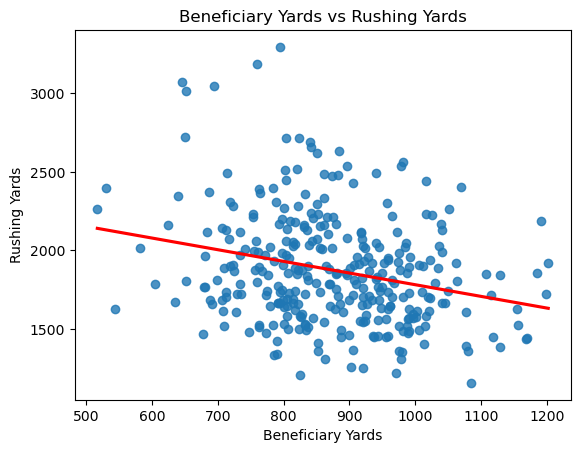

In [310]:
sns.regplot(
    data=nfl,
    x='Beneficiary Yards',
    y='Rushing Yards',
    line_kws={'color':'red'},
    ci=False
)

plt.title('Beneficiary Yards vs Rushing Yards')
plt.xlabel('Beneficiary Yards')
plt.ylabel('Rushing Yards')
plt.show()

In [311]:
pearson_coef, p_value = stats.pearsonr(nfl['Beneficiary Yards'], nfl['Rushing Yards'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.25752549362038785  with a P-value of 3.0460305262699334e-06


Since the p-value is less than 0.05, the correlation between beneficiary yards and rushing yards is statistically significant. The more beneficiary yards a team receives, the lower their rushing yards will be.

### Group teams by high vs low penalty count and compare average performance

In [314]:
nfl['High Penalty'] = nfl['Penalty Count'] > nfl['Penalty Count'].median()
nfl.groupby('High Penalty')[['Wins', 'Total Points', 'Total Points Allowed', 'Total Yards', 'Total Yards Allowed']].mean()

,Wins,Total Points,Total Points Allowed,Total Yards,Total Yards Allowed
High Penalty,,,,,
False,8.45625,376.45625,371.76250,5663.02500,5670.13125
True,7.88125,370.12500,374.81875,5639.71875,5632.61250


<Axes: xlabel='High Penalty', ylabel='Wins'>

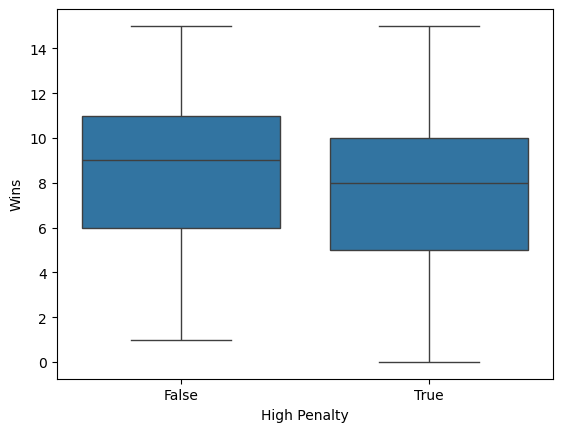

In [315]:
sns.boxplot(data=nfl, x='High Penalty', y='Wins')

Teams that receive more penalties win 0.575 fewer games, score 6.331 fewer total points, allow 3.056 more total points, have 23.306 fewer total yards, but allow 37.519 fewer total yards on average.

### Let's use penalty counts and Logistic Regression to predict whether a team will make the playoffs

In [318]:
X = nfl[['Penalty Count', 'Beneficiary Count', 'Holding Count', 'Opponent Holding Count', 'PI Count', 'Opponent PI Count']]
y = nfl['Playoffs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [320]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [321]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[31  6]
 [17 10]]
Accuracy: 0.640625
ROC AUC Score: 0.6496496496496497


The model did well with predicting if a team won't make the playoffs (31 true negatives) but struggled more with predicting playoff teams (17 false negatives). 

# 2. Are there seasonal trends in penalties?

### Let's use an exponential smoothing model to predict future penalty counts

In [325]:
pen_time_series = nfl.groupby('Season')['Penalty Count'].mean()

In [326]:
train = pen_time_series[:7]
test = pen_time_series[7:]

In [327]:
#Use alpha levels of 0.8 and 0.2
for alpha in [0.8, 0.2]:
    ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    ses_forecast = ses_model.forecast(len(test))
    mae = mean_absolute_error(test, ses_forecast)
    print('Simple Exponentional Smoothing with alpha:', alpha)
    print('Mean absolute error:', mae)

Simple Exponentional Smoothing with alpha: 0.8
Mean absolute error: 5.603711333333337
Simple Exponentional Smoothing with alpha: 0.2
Mean absolute error: 7.283231333333343


C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Val

The MAE for the model with alpha = 0.8 is lower, so we'll plot that one.

In [329]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.8, optimized=False)
ses_forecast = ses_model.forecast(len(test))
mae = mean_absolute_error(test, ses_forecast)

C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\madys\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


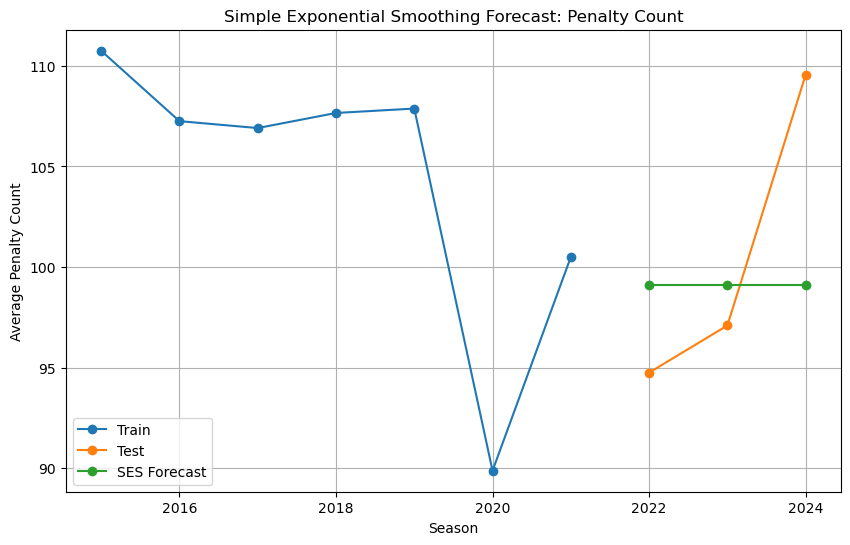

In [330]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Train', marker='o')
plt.plot(test.index, test.values, label='Test', marker='o')
plt.plot(test.index, ses_forecast, label='SES Forecast', marker='o')
plt.title('Simple Exponential Smoothing Forecast: Penalty Count')
plt.xlabel('Season')
plt.ylabel('Average Penalty Count')
plt.legend()
plt.grid(True)
plt.show()

### Now let's create line graphs that showcase the trends in offensive holding and defensive pass interference

In [332]:
avg_holding = nfl.groupby('Season')['Holding Count'].mean()

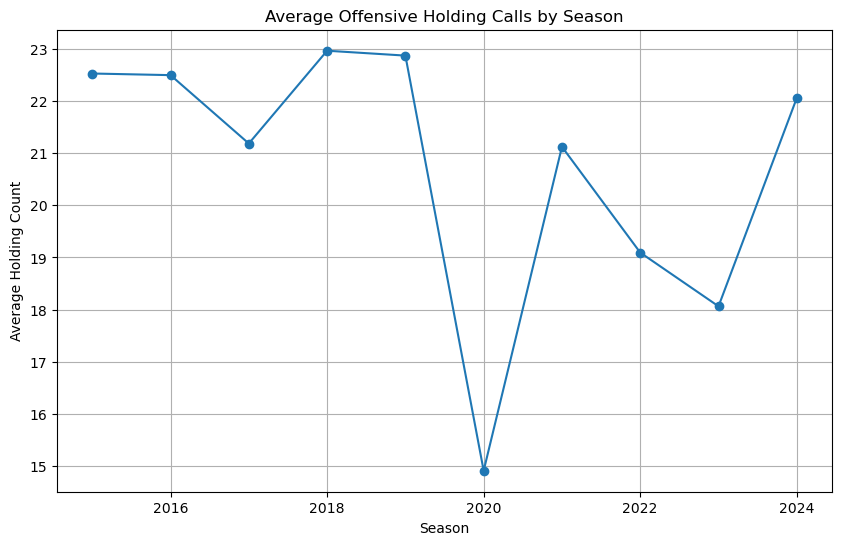

In [333]:
plt.figure(figsize=(10, 6))
plt.plot(avg_holding.index, avg_holding.values, marker='o')
plt.title('Average Offensive Holding Calls by Season')
plt.xlabel('Season')
plt.ylabel('Average Holding Count')
plt.grid(True)
plt.show()

In [334]:
avg_pi = nfl.groupby('Season')['PI Count'].mean()

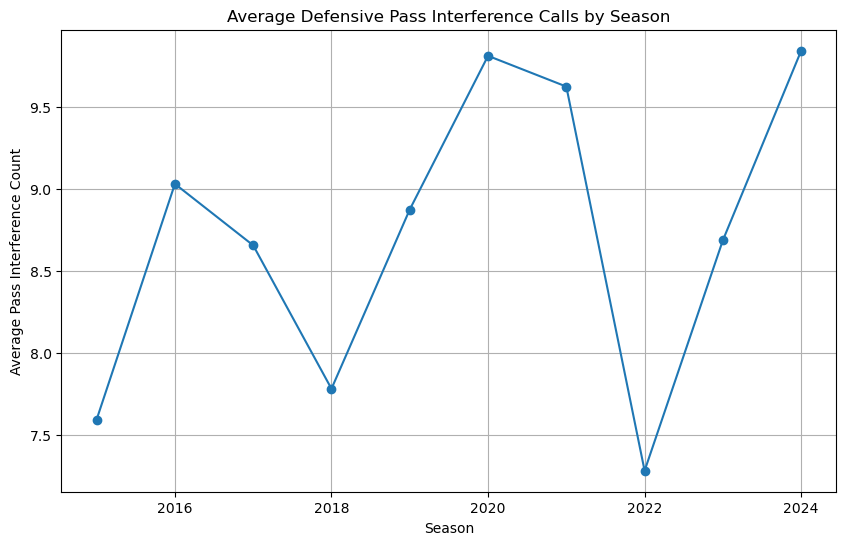

In [335]:
plt.figure(figsize=(10, 6))
plt.plot(avg_pi.index, avg_pi.values, marker='o')
plt.title('Average Defensive Pass Interference Calls by Season')
plt.xlabel('Season')
plt.ylabel('Average Pass Interference Count')
plt.grid(True)
plt.show()

Interestingly enough, offensive holding was the lowest in 2020, yet pass interference was very high in 2020.

# 3. Are certain teams more or less likely to receive penalties?

### Let's first take a look at each team's total penalty and beneficiary counts and use a bar chart to plot them

In [339]:
total_penalties = nfl.groupby('Team')['Penalty Count'].sum().sort_values(ascending=False)

total_benefit = nfl.groupby('Team')['Beneficiary Count'].sum().sort_values(ascending=False)

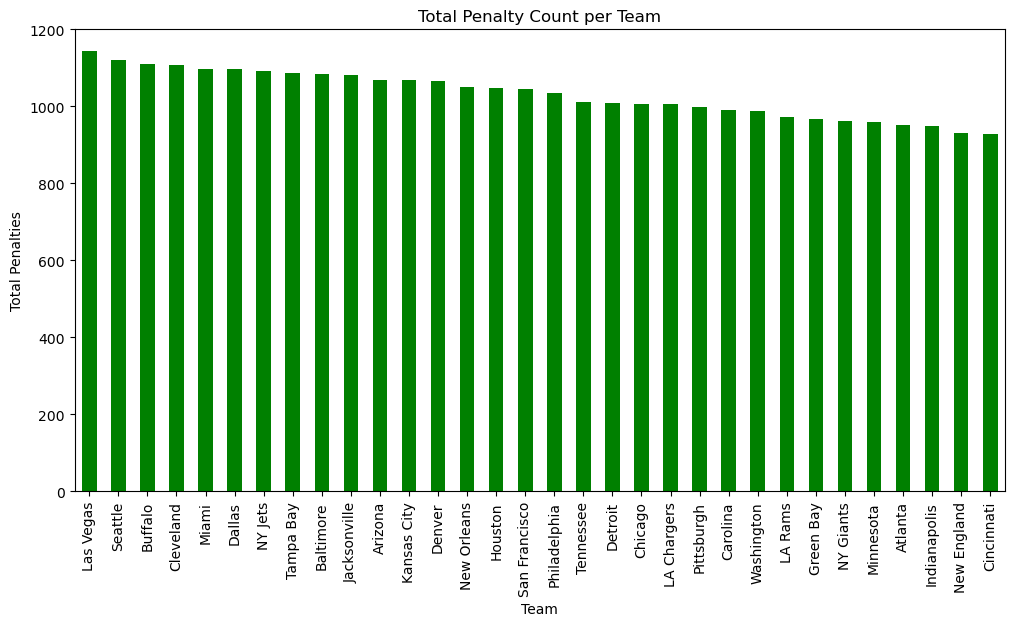

In [340]:
plt.figure(figsize=(12, 6))
total_penalties.plot(kind='bar', color='green')
plt.title('Total Penalty Count per Team')
plt.ylabel('Total Penalties')
plt.xlabel('Team')
plt.show()

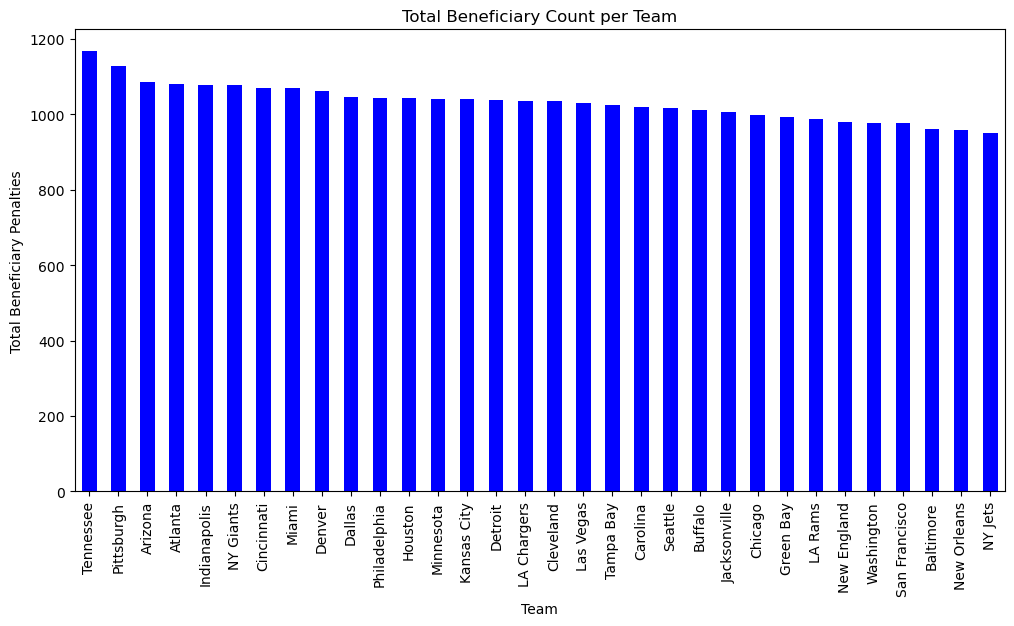

In [341]:
plt.figure(figsize=(12, 6))
total_benefit.plot(kind='bar', color='blue')
plt.title('Total Beneficiary Count per Team')
plt.ylabel('Total Beneficiary Penalties')
plt.xlabel('Team')
plt.show()

The Las Vegas Raiders have received the most penalties over the last 10 seasons, whereas the Tennessee Titans have had the most beneficiary penalties. The Kansas City Chiefs are close to the middle for both metrics.

### Use K-Means clustering to group teams by similar penalty characteristics

In [344]:
penalty_features = nfl.groupby('Team')[[
    'Penalty Count',
    'Penalty Yards',
    'Holding Count',
    'PI Count',
    'PI Yards'
]].mean()

In [345]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penalty_features)

In [346]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
penalty_features['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\madys\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [347]:
for cluster in sorted(penalty_features['Cluster'].unique()):
    teams = penalty_features[penalty_features['Cluster'] == cluster].index.tolist()
    print(f'Cluster {cluster}: {', '.join(teams)}')

Cluster 0: Arizona, Buffalo, Cleveland, Dallas, Denver, Jacksonville, Miami, Seattle, Tampa Bay
Cluster 1: Detroit, Houston, NY Jets, San Francisco, Tennessee
Cluster 2: Atlanta, Carolina, Chicago, Cincinnati, Green Bay, Indianapolis, LA Chargers, LA Rams, Minnesota, NY Giants, New England, Philadelphia, Pittsburgh, Washington
Cluster 3: Baltimore, Kansas City, Las Vegas, New Orleans


In [348]:
cluster_summary = penalty_features.groupby('Cluster').mean()
print(cluster_summary)

         Penalty Count  Penalty Yards  Holding Count   PI Count    PI Yards
Cluster                                                                    
0           109.288889     915.077778      22.177778   8.188889  131.266667
1           104.120000     894.020000      20.520000   9.680000  169.400000
2            97.450000     819.650000      19.450000   7.864286  129.557143
3           108.650000     948.750000      22.225000  11.700000  189.525000


In [349]:
cluster_summary = penalty_features.groupby('Cluster')[[
    'Penalty Count', 'Penalty Yards', 'Holding Count', 'PI Count', 'PI Yards'
]].mean().reset_index()

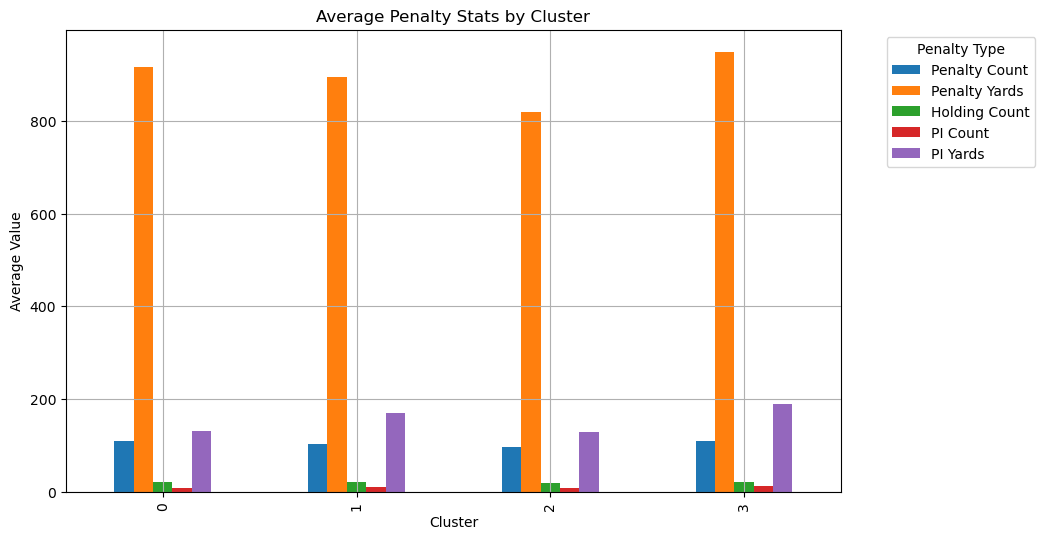

In [350]:
cluster_summary.plot(x='Cluster', kind='bar', figsize=(10, 6))
plt.title('Average Penalty Stats by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.legend(title='Penalty Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### K-Means clustering with beneficiary penalties

In [352]:
beneficiary_features = nfl.groupby('Team')[[
    'Beneficiary Count',
    'Beneficiary Yards',
    'Opponent Holding Count',
    'Opponent PI Count',
    'Opponent PI Yards'
]].mean()

In [353]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(beneficiary_features)

In [354]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
beneficiary_features['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\madys\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [355]:
for cluster in sorted(beneficiary_features['Cluster'].unique()):
    teams = beneficiary_features[beneficiary_features['Cluster'] == cluster].index.tolist()
    print(f'Cluster {cluster}: {', '.join(teams)}')

Cluster 0: Baltimore, Buffalo, Carolina, Chicago, Cleveland, Kansas City, LA Rams, NY Jets, New Orleans, San Francisco, Washington
Cluster 1: Atlanta, Cincinnati, Dallas, Denver, Detroit, Houston, LA Chargers, Miami, NY Giants, Philadelphia
Cluster 2: Arizona, Indianapolis, Las Vegas, Pittsburgh, Tennessee
Cluster 3: Green Bay, Jacksonville, Minnesota, New England, Seattle, Tampa Bay


In [356]:
cluster_summary = beneficiary_features.groupby('Cluster').mean()
print(cluster_summary)

         Beneficiary Count  Beneficiary Yards  Opponent Holding Count  \
Cluster                                                                 
0                99.218182         829.836364               19.500000   
1               105.680000         888.280000               21.420000   
2               109.760000         947.620000               23.740000   
3               101.016667         871.133333               19.333333   

         Opponent PI Count  Opponent PI Yards  
Cluster                                        
0                 6.972727         114.490909  
1                 9.140000         142.180000  
2                10.060000         171.840000  
3                10.100000         176.650000  


In [357]:
cluster_summary = beneficiary_features.groupby('Cluster')[[
    'Beneficiary Count', 'Beneficiary Yards', 'Opponent Holding Count', 'Opponent PI Count', 'Opponent PI Yards'
]].mean().reset_index()

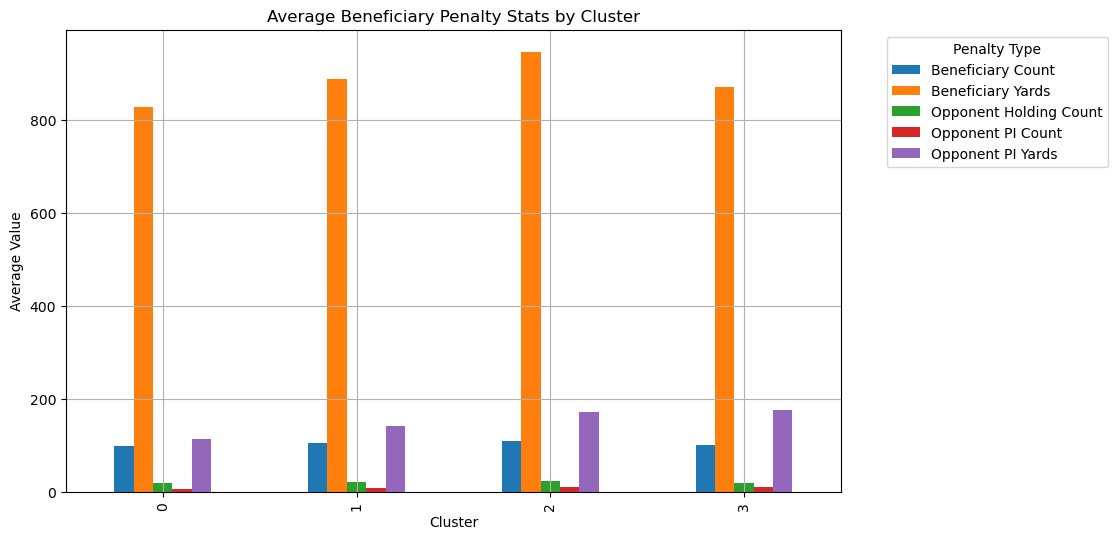

In [358]:
cluster_summary.plot(x='Cluster', kind='bar', figsize=(10, 6))
plt.title('Average Beneficiary Penalty Stats by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.legend(title='Penalty Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Lastly, let's see the teams who have received and drawn the most "subjective" penalties

In [360]:
most_penalties = nfl.groupby('Team')[['Holding Count', 'PI Count']].sum()
most_penalties['Total'] = most_penalties['Holding Count'] + most_penalties['PI Count']

In [361]:
most_penalties_sorted = most_penalties.sort_values('Total', ascending=False)

display(most_penalties_sorted)

,Holding Count,PI Count,Total
Team,,,
Kansas City,257,124,381
Buffalo,247,89,336
Baltimore,219,114,333
Dallas,253,76,329
New Orleans,198,129,327
San Francisco,221,103,324
Detroit,208,109,317
Las Vegas,215,101,316
Tampa Bay,221,82,303


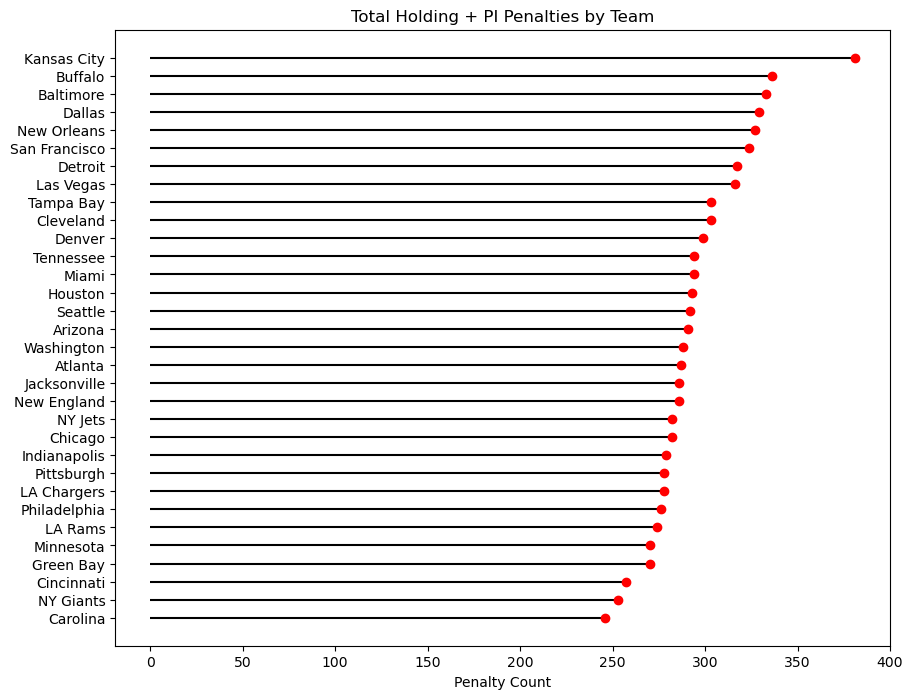

In [362]:
data = most_penalties_sorted['Total'].sort_values()
teams = data.index
values = data.values

plt.figure(figsize=(10, 8))
plt.hlines(y=teams, xmin=0, xmax=values, color='black')
plt.plot(values, teams, 'o', color='red')
plt.title('Total Holding + PI Penalties by Team')
plt.xlabel('Penalty Count')
plt.show()

Surprisingly, the Kansas City Chiefs have received the most subjective penalties. Now let's see which teams benefit the most from these penalties. 

In [364]:
most_benefit = nfl.groupby('Team')[['Opponent Holding Count', 'Opponent PI Count']].sum()
most_benefit['Total'] = most_benefit['Opponent Holding Count'] + most_benefit['Opponent PI Count']

In [365]:
most_benefit_sorted = most_benefit.sort_values('Total', ascending=False)

display(most_benefit_sorted)

,Opponent Holding Count,Opponent PI Count,Total
Team,,,
Pittsburgh,229,126,355
Las Vegas,253,102,355
Arizona,244,102,346
Tennessee,249,81,330
Cincinnati,213,111,324
LA Chargers,221,99,320
Green Bay,202,116,318
Houston,222,88,310
Dallas,215,94,309


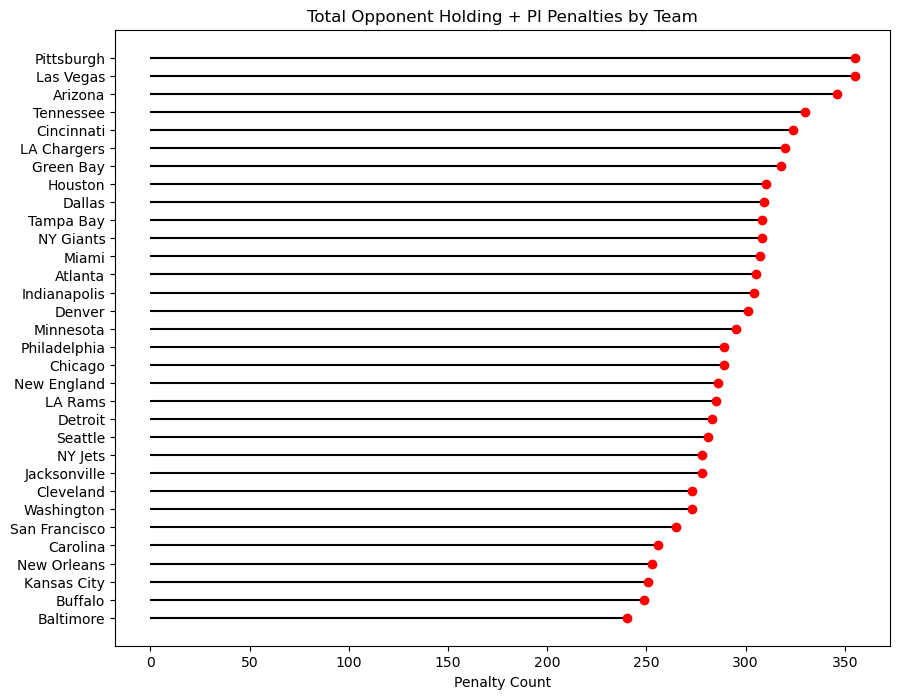

In [366]:
data = most_benefit_sorted['Total'].sort_values()
teams = data.index
values = data.values

plt.figure(figsize=(10, 8))
plt.hlines(y=teams, xmin=0, xmax=values, color='black')
plt.plot(values, teams, 'o', color='red')
plt.title('Total Opponent Holding + PI Penalties by Team')
plt.xlabel('Penalty Count')
plt.show()

The Pittsburgh Steelers and Las Vegas Raiders have drawn the most subjective penalties from opponents.